In [20]:
import pandas as pd
import numpy as np
import time
import joblib

from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

from quadratic_weighted_kappa import quadratic_weighted_kappa

from scipy.spatial.distance import pdist,squareform

import xgboost
import shap

from scipy.stats import pearsonr

In [54]:
x = joblib.load('essay_ease10_sbert768_simbow_langerr_780_normalized_asap7')
y = joblib.load('score_asap7').to_numpy()
pred_gb = joblib.load('score_model_normalized_float')
pred_rf = joblib.load('score_model_rf_normalized_float')
pred_rr = joblib.load('score_model_rr_normalized_float')

x_normed = x / x.max(axis=0)

In [47]:
quadratic_weighted_kappa(y, pred_rr)

0.7718910728446616

In [48]:
traits = joblib.load('df_essay7_traits_sum')

In [9]:
x.shape

(1569, 780)

In [10]:
data = joblib.load('data_tsne_pca_umap_diffmap')
data

,y,pred,tsne-2d-one,tsne-2d-two,umap-2d-one,umap-2d-two,diffmap-2d-one,diffmap-2d-two,pca-2d-one,pca-2d-two
0,15,11.0,6.905783,-28.001387,12.735165,7.402746,-1.414535,0.121195,-369.029179,-24.199911
1,13,12.0,10.329441,-26.846012,12.562725,6.272478,-1.483303,0.224584,-391.896183,-5.614870
2,15,14.0,-23.188786,-6.363763,5.430835,16.480778,0.005483,-0.953993,-75.838300,-16.348918
3,17,19.0,-2.596609,28.076660,-1.728859,3.877389,1.571091,0.327579,361.575270,8.005186
4,13,15.0,-23.901937,3.841275,1.988631,15.346888,0.385608,-0.869135,-0.573224,-13.879815
...,...,...,...,...,...,...,...,...,...,...
1564,12,12.0,24.789839,-21.670937,11.575723,-1.022594,-1.777769,0.739977,-535.541400,7.441269
1565,16,16.0,-2.291806,30.220858,-1.481885,3.493294,1.600511,0.374606,372.442169,-43.717266
1566,19,16.0,-21.810844,9.823751,0.181815,13.880360,0.645239,-0.726288,58.664160,-10.859545
1567,22,21.0,15.015631,34.220737,-0.997348,-4.454279,1.886067,0.879353,771.792728,26.499247


## tsne

In [11]:
tsne1 = data['tsne-2d-one'].to_numpy().reshape(-1,1)
tsne2 = data['tsne-2d-two'].to_numpy().reshape(-1,1)
x_tsne = np.concatenate((tsne1, tsne2), axis=1)
x_tsne

array([[  6.9057827, -28.001387 ],
       [ 10.329441 , -26.846012 ],
       [-23.188786 ,  -6.3637633],
       ...,
       [-21.810844 ,   9.823751 ],
       [ 15.015631 ,  34.220737 ],
       [-20.710241 ,  -4.304389 ]], dtype=float32)

### PCA

In [12]:
pca1 = data['pca-2d-one'].to_numpy().reshape(-1,1)
pca2 = data['pca-2d-two'].to_numpy().reshape(-1,1)
x_pca = np.concatenate((pca1, pca2), axis=1)
x_pca

array([[-369.02917939,  -24.1999106 ],
       [-391.89618347,   -5.61486955],
       [ -75.83829973,  -16.34891835],
       ...,
       [  58.66415988,  -10.85954533],
       [ 771.79272832,   26.4992473 ],
       [ -60.28334543,   23.13783874]])

## UMAP

In [13]:
umap1 = data['umap-2d-one'].to_numpy().reshape(-1,1)
umap2 = data['umap-2d-two'].to_numpy().reshape(-1,1)
x_umap = np.concatenate((umap1, umap2), axis=1)
x_umap

array([[12.735165 ,  7.4027457],
       [12.562725 ,  6.272478 ],
       [ 5.430835 , 16.480778 ],
       ...,
       [ 0.1818145, 13.88036  ],
       [-0.9973482, -4.454279 ],
       [ 4.917033 , 15.903855 ]], dtype=float32)

## DiffMap

In [14]:
diffmap1 = data['diffmap-2d-one'].to_numpy().reshape(-1,1)
diffmap2 = data['diffmap-2d-two'].to_numpy().reshape(-1,1)
x_diffmap = np.concatenate((diffmap1, diffmap2), axis=1)
x_diffmap

array([[-1.41453482,  0.1211946 ],
       [-1.48330295,  0.22458393],
       [ 0.00548346, -0.95399337],
       ...,
       [ 0.64523859, -0.72628785],
       [ 1.88606729,  0.87935267],
       [ 0.03703411, -0.95366556]])

## 1569 essays

In [15]:
dist_euclid = squareform(pdist(x, metric='cosine'))
dist_euclid

array([[0.        , 0.00135857, 0.00085892, ..., 0.00089137, 0.00196194,
        0.00304498],
       [0.00135857, 0.        , 0.00048242, ..., 0.00058442, 0.00097013,
        0.00114747],
       [0.00085892, 0.00048242, 0.        , ..., 0.00045843, 0.00111415,
        0.00137048],
       ...,
       [0.00089137, 0.00058442, 0.00045843, ..., 0.        , 0.00042229,
        0.00101524],
       [0.00196194, 0.00097013, 0.00111415, ..., 0.00042229, 0.        ,
        0.00042436],
       [0.00304498, 0.00114747, 0.00137048, ..., 0.00101524, 0.00042436,
        0.        ]])

In [17]:
outcome_euclid = squareform(pdist(pred_gb.reshape(-1,1), metric='euclidean'))
outcome_euclid

array([[ 0.        ,  1.86234856,  3.80556679, ...,  5.55392647,
        10.2943058 ,  5.65491295],
       [ 1.86234856,  0.        ,  1.94321823, ...,  3.69157791,
         8.43195724,  3.79256439],
       [ 3.80556679,  1.94321823,  0.        , ...,  1.74835968,
         6.48873901,  1.84934616],
       ...,
       [ 5.55392647,  3.69157791,  1.74835968, ...,  0.        ,
         4.74037933,  0.10098648],
       [10.2943058 ,  8.43195724,  6.48873901, ...,  4.74037933,
         0.        ,  4.63939285],
       [ 5.65491295,  3.79256439,  1.84934616, ...,  0.10098648,
         4.63939285,  0.        ]])

In [18]:
dist = dist_euclid
outcome = outcome_euclid

In [19]:
dist = dist / dist.max()
outcome = outcome / outcome.max()

## Evaluate whether pairs of essay satisfy the equation

\begin{equation}
    D(Mx, My) \leq d(x,y)
\end{equation}

In [54]:
IF = outcome <= dist
IF

array([[ True, False, False, ..., False, False, False],
       [False,  True, False, ..., False, False, False],
       [False, False,  True, ..., False, False, False],
       ...,
       [False, False, False, ...,  True, False,  True],
       [False, False, False, ..., False,  True, False],
       [False, False, False, ...,  True, False,  True]])

In [55]:
(np.count_nonzero(IF) - 1569) / 2

38061.0

## Number of True pairs

Number of pairs (excluding with selves): 1.230.096 pairs  
x 38061 : 3.1%  
x_normed 2041 : 0.17%  
x_pca 636846 : 51.8%  
x_tsne 903387 : 73.4%  
x_umap 712437 : 58%  
x_diffmap 870131 : 70.7%  

## Pearson's Correlation

In [114]:
distance = pdist(x, metric='cosine')
distance = distance / distance.max()

### Gradient Boosting

In [115]:
output_gb = pdist(pred_gb.reshape(-1,1), metric='euclidean')
output_gb = output_gb / output_gb.max()

corr_gb, _ = pearsonr(distance, output_gb)
print("Pearsons Correlation GB and distance : ", corr_gb)

Pearsons Correlation GB and distance :  0.12813248511888004


### Random Forest

In [116]:
output_rf = pdist(pred_rf.reshape(-1,1), metric='euclidean')
output_rf = output_rf / output_rf.max()

corr_rf, _ = pearsonr(distance, output_rf)
print("Pearsons Correlation RF and distance : ", corr_rf)

Pearsons Correlation RF and distance :  0.15105070002449497


### Ridge Regression

In [117]:
output_rr = pdist(pred_rr.reshape(-1,1), metric='euclidean')
output_rr = output_rr / output_rr.max()

corr_rr, _ = pearsonr(distance, output_rr)
print("Pearsons Correlation RR and distance : ", corr_rr)

Pearsons Correlation RR and distance :  0.10935615471041849


### Human

In [118]:
output_human = pdist(y.reshape(-1,1), metric='euclidean')
output_human = output_human / output_human.max()

corr_human, _ = pearsonr(distance, output_human)
print("Pearsons Correlation Human and distance : ", corr_human)

Pearsons Correlation Human and distance :  0.1701443715566205


### Pearsons Correlation GB and distance :  0.128
### Pearsons Correlation RF and distance :  0.151
### Pearsons Correlation RR and distance :  0.109
### Pearsons Correlation Human and distance :  0.170

In [119]:
output_gb

array([0.09891671, 0.20212873, 0.46993256, ..., 0.25178033, 0.00536379,
       0.24641654])

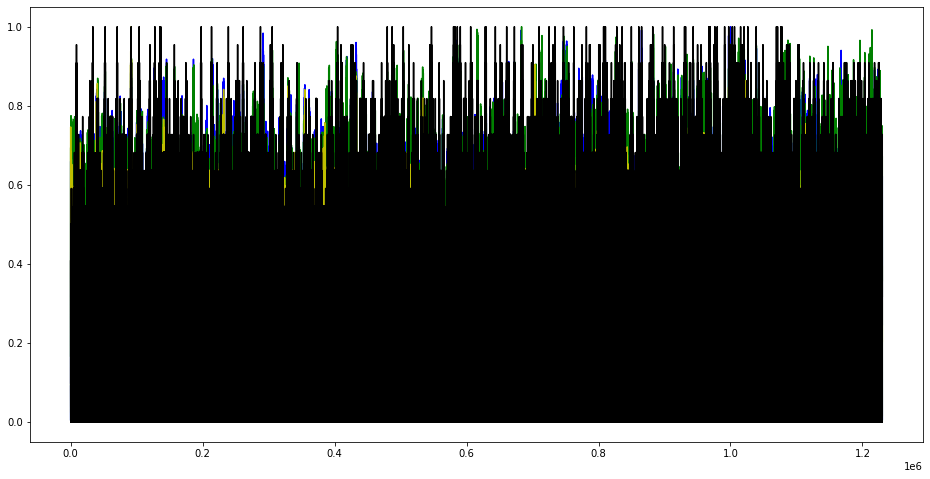

In [120]:
plt.figure(figsize=(16,8))

plt.plot(output_gb, c='b')
plt.plot(output_rf, c='g')
plt.plot(output_rr, c='y')
plt.plot(output_human, c='black')

plt.show()

In [124]:
import random

index_value = random.sample(list(enumerate(output_gb)), 100)

indexes = []
samples_gb = []
for idx, val in index_value:
    indexes.append(idx)
    samples_gb.append(val)
#print(indexes) # [4, 6]
#print(samples_gb) # [6, 9]

In [125]:
samples_rf = [output_rf[i] for i in indexes]
samples_rr = [output_rr[i] for i in indexes]
samples_human = [output_human[i] for i in indexes]

samples_distance = [distance[i] for i in indexes]

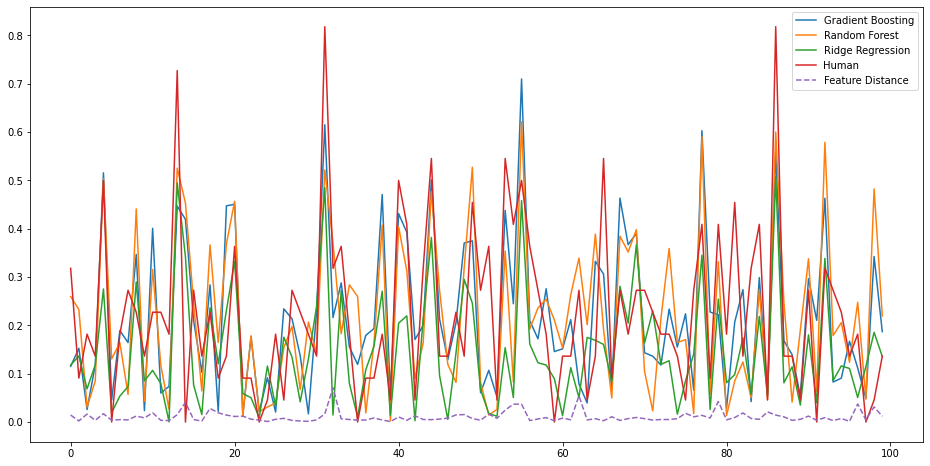

In [126]:
plt.figure(figsize=(16,8))

plt.plot(samples_gb, label='Gradient Boosting')
plt.plot(samples_rf, label='Random Forest')
plt.plot(samples_rr, label='Ridge Regression')
plt.plot(samples_human, label='Human')

plt.plot(samples_distance, '--', label='Feature Distance')

plt.legend()
plt.show()

In [87]:
a = [1,2,3,4,5,6,7,8]
b = [1,3,5]

In [89]:
[a[i] for i in b]

[2, 4, 6]

In [113]:
np.max(distance)

1.0

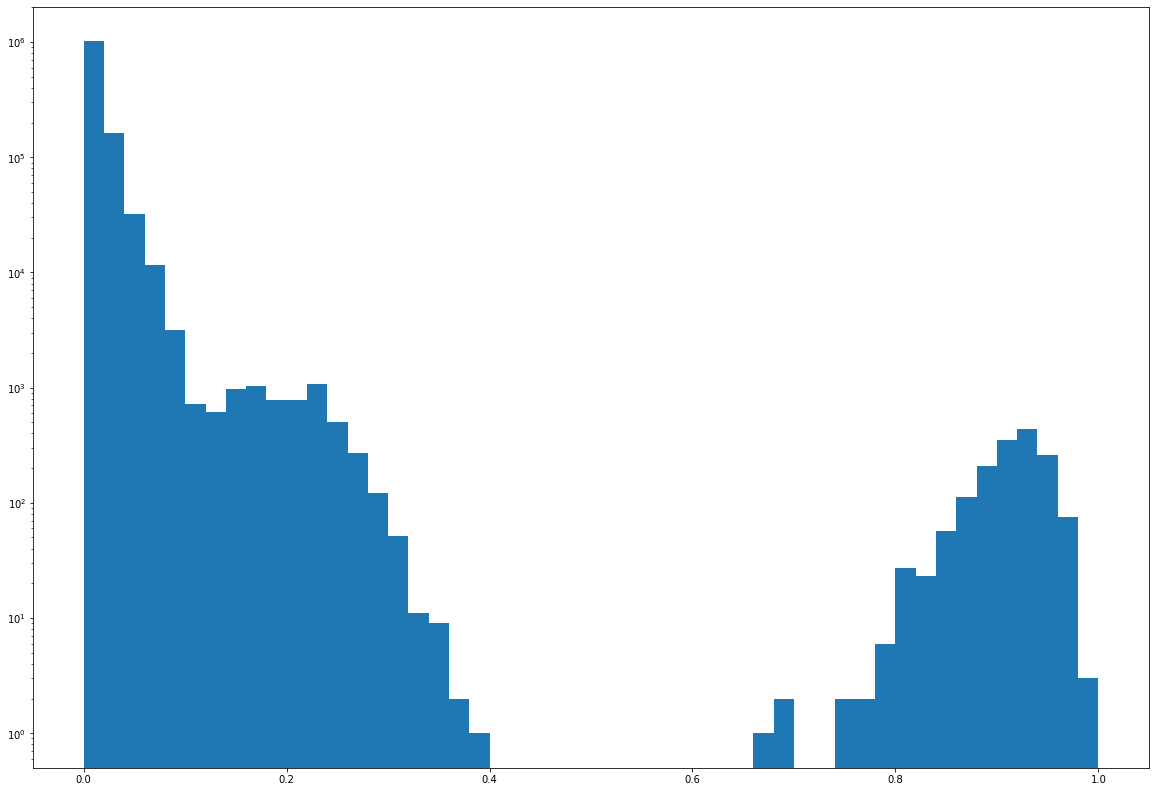

In [144]:
plt.figure(figsize=(20,14))

plt.hist(distance, bins=50)
plt.yscale('log')
plt.show()

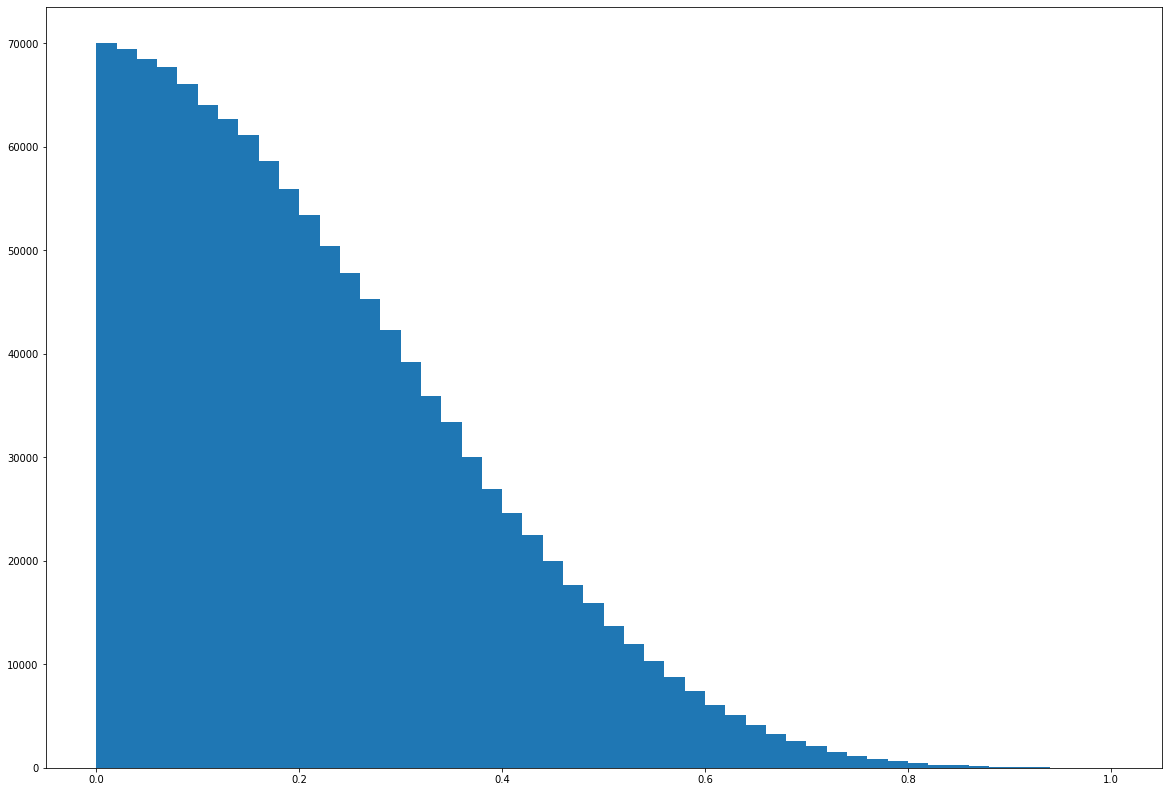

In [143]:
plt.figure(figsize=(20,14))

plt.hist(output_gb, bins=50)
#plt.yscale('log')
plt.show()